In [ ]:
# Good coding convention: Move all imports to the top of your notebook/file
import pandas as pd
import numpy as np # We will also be needing numpy as pandas is tightly integrated with numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas and Data Visualization
## Pandas
### Motivation for pandas
Dictionaries allow us to save multiple attributes of a particular object. For example, we can store some information about a lesson:

In [ ]:
lesson_5 = {
    'topic': 'Numpy',
    'teacher': 'Sam',
    'week': 5
}

Often, we collect multiple observations for which we record the same attributes and we'd like to store them together:

In [ ]:
lesson_3 = {
    'topic': 'Basics of Python 2',
    'teacher': 'Jasmine',
    'week': 3
}
lesson_1 = {
    'topic': 'Setting up Python',
    'teacher': 'Jasmine',
    'week': 1
}

We could go about this by storing them in a list:

In [ ]:
lst_lessons = [lesson_5, lesson_3, lesson_1]

In [ ]:
lst_lessons

However, such lists are lacking a lot of functionality. For example, we may want to print out only those observations where Jasmine was the teacher. We'd have to use a for loop for this:

In [ ]:
jasmines_lessons = [
    lesson for lesson in lst_lessons if lesson['teacher'] == 'Jasmine'
]
jasmines_lessons

We therefore need a new data structure that can record multiple pieces of information about multiple observations. This is provided by `pandas` (which stands for *panel data*):

The core object in pandas is a *data frame*, which consists of observations organized along its rows and different pieces of information about its observations organized along its columns.

In [ ]:
df_lessons = pd.DataFrame(lst_lessons)
df_lessons

### Exercises
Put together, we created our data frame using the following command:

In [ ]:
df_lessons = pd.DataFrame([
    {
        'topic': 'Setting up Python',
        'teacher': 'Jasmine',
        'week': 1
    },
    {
        'topic': 'Basics of Python 2',
        'teacher': 'Jasmine',
        'week': 3
    },
    {
        'topic': 'Numpy',
        'teacher': 'Sam',
        'week': 5
    }
])

1. Create a data frame that additionally includes this week (week 6) with the appropriate topic (pandas) and teacher (Sam) by modifying the code above.
2. (Advanced.) Create a new data frame that also includes week 7's lesson with teacher Abhi. However, you don't know the topic yet. How does `pandas` represent this information? (Hint: Create a dictionary that only contains the keys `week` and `teacher`, but not `topic`. Try adding it to the list we used above and turning it into a dataframe.)

### Finding out basic information

In [ ]:
df_lessons.shape

In [ ]:
df_lessons.columns

### Indexing

Regular brackets return a specific column or a subset of columns:

In [ ]:
df_lessons['teacher']

(*Note:* The object that is returned is called a `pd.Series` and has a few additional features compared to a one-dimensional numpy array. I personally don't use those additional features and think they are counter-productive, but you can look them up if you have to interact with them.)

You can operate on those columns in the same way you would operate on numpy arrays:

In [ ]:
df_lessons['teacher'] == 'Jasmine'

In [ ]:
df_lessons[['topic', 'teacher']]

`.loc` allows you to index data frames by row numbers and column names:

In [ ]:
df_lessons.loc[1, 'teacher']

This also works with slicing:

In [ ]:
df_lessons.loc[1:, 'teacher']

In [ ]:
df_lessons.loc[:, ['topic', 'teacher']]

`iloc` works in the same way, but allows you to access columns according to their numerical index rather than their name:

In [ ]:
df_lessons.iloc[1, 1]

Finally you can also do boolean indexing with rectangular brackets.

In [ ]:
selector = df_lessons['teacher'] == 'Jasmine'
df_lessons[selector]

(Note that the single `=` assigns the command to the right of it to the variable on its left. The double `==` on the other hand compares the values in `df_lessons['teacher']` and determines whether they are equal to `'Jasmine'`.)

In [ ]:
df_lessons[df_lessons['teacher']=='Jasmine']

Finally, you can add new columns in the same way you would add a new key, value pair to a dictionary:

In [ ]:
df_lessons

In [ ]:
df_lessons['homework'] = [True, False, True]

In [ ]:
df_lessons

In [ ]:
df_lessons['week_minus_1'] = df_lessons['week']-1

In [ ]:
df_lessons

In [ ]:
# Recall that we've created df_lessons this way
df_lessons = pd.DataFrame([
    {
        'topic': 'Setting up Python',
        'teacher': 'Jasmine',
        'week': 1
    },
    {
        'topic': 'Basics of Python 2',
        'teacher': 'Jasmine',
        'week': 3
    },
    {
        'topic': 'Numpy',
        'teacher': 'Sam',
        'week': 5
    },
    {
        'topic': 'pandas',
        'teacher': 'Sam',
        'week': 6
    }
])

### Exercises
1. Print out the topic for the second row using `.loc`.
2. Subset the data frame to only print out the lessons for week 3 and higher using boolean indexing.
3. (Advanced.) You could have alternately also represented this information as a two-dimensional array with observations structured along rows and variables structured along columns. What would the difference be and why might this be a bad idea in this case? Discuss with the other students at your table.

### Saving and loading a data frame
You can save data frames in different formats. A popular format is csv (comma-separated values), which represents each observation in one row and each variable separated by commas.

In [ ]:
df_lessons.to_csv('df_lessons.csv')

Let's inspect this file.

We'll be using csv files today. Note that they are not always ideal. For example, they do not save the type of your different values which can lead to issues. In my own work, I usually use the feather format, which is less commonplace, however.

In [ ]:
df_lessons_loaded = pd.read_csv('df_lessons.csv')

In [ ]:
df_lessons_loaded

In [ ]:
df_lessons_loaded.drop(columns='Unnamed: 0')

In [ ]:
df_lessons_loaded

In [ ]:
df_lessons_loaded = df_lessons_loaded.drop(columns='Unnamed: 0')

### Exercises
1. Read in the file `dot_motion.csv` using pandas and assign it to the variable `df_dm`.
2. Try exploring the file and describe the data contained in it.
3. Subset the data frame to only contain the observations with a reaction time of above 700.
4. (Advanced.) Create a new variable 'accuracy' that is 1 if the motion and the choice are matching and 0 otherwise. Assign it to a new column of the data frame. (You do not need to write a for loop here, you can do this using vectorized operations in the same way you have used them with numpy.)

**Hint for 4**

If the motion and choice are matching, their entries should be equal. Create a new variable `accuracy` that contains as a boolean whether they are or are not matching. You can turn this boolean array (with True and False value) into a float array (which will assign 1 to True and 0 to False), using `accuracy.astype(float)`.


In [ ]:
motion = 'left'
choice = 'right'

In [ ]:
motion==choice

### Group by
With data frames we can compute summary statistics. For these summary satistics, we might want to group observations together if they have the same value in certain columns. We can do this using `groupby`.

If you haven't been able to create the `accuracy` column, please load the data frame which contains that column here:

In [ ]:
df_dm = pd.read_csv('dot_motion_with_accuracy.csv')

In [ ]:
grouped_by_subject = df_dm.groupby(['subject'])
print(grouped_by_subject)

By default, we don't really see this object. But we can inspect the groups:

In [ ]:
grouped_by_subject.groups

In [ ]:
grouped_by_subject.groups.keys()

We can also get each individual group:

In [ ]:
grouped_by_subject.get_group('Subject 1')

The 'Unnamed: 0' column here is an artifact of how pandas treats row names. Here our row names (which are simply the list from 0-199) were turned into a column that did not have a name. If this happens, I recommend ignoring or removing those columns.

Because we only want to compute the mean for the reaction time and accuracy, we subset these two columns. We can do this as with a normal data frame.

In [ ]:
grouped_by_subject_subset = grouped_by_subject[['reaction_time', 'accuracy']]
grouped_by_subject_subset

In [ ]:
grouped_by_subject_subset.get_group('Subject 1') # We have removed the other columns

We can now apply the function `mean`, to summarise each group:

In [ ]:
mean_reaction_time = grouped_by_subject_subset.mean()
mean_reaction_time

In [ ]:
mean_reaction_time.columns

By default, the variables according to which the data frame is being grouped are not columns anymore but rather a property called row names. (We'll learn more about them in the supplementary material.) I dislike rownames and try to avoid them in my own work. You can turn them back into a column using the method `reset_index`.

In [ ]:
mean_reaction_time_df = mean_reaction_time.reset_index()
mean_reaction_time_df

Taken together, here is what we did:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])\
                              [['reaction_time', 'accuracy']]\
                             .mean()\
                             .reset_index()
mean_reaction_time_df

`\` allows you to break a line without this changing your code. The above would be equivalent to one long line as below:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])[['reaction_time', 'accuracy']].mean().reset_index()
mean_reaction_time_df

Breaking lines often makes your code more easily understandable.

A couple of aggregate functions are implemented as methods, for example `mean`, `max`, and `min`. You can also supply your own function by using the `apply` method. For example, the following command is equivalent to what we computed above:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])\
                              [['reaction_time', 'accuracy']]\
                             .apply(np.mean)\
                             .reset_index()
mean_reaction_time_df

Below, we instead compute the 75-th quantile:

In [ ]:
def quantile_75(x):
  return x.quantile(.75)

The `quantile` method takes as argument which quantile it should be computing.

In [ ]:
rt_75 = df_dm.groupby(['subject'])\
              [['reaction_time']]\
              .apply(quantile_75)\
              .reset_index()
rt_75

We can also group by multiple variables at once:

In [ ]:
grouped_by_subject_and_choice = df_dm.groupby(['subject', 'choice'])
grouped_by_subject_and_choice.groups.keys()

This way, we can compute summary statistics for groups of multiple variables at once:

In [ ]:
rt_75 = df_dm.groupby(['subject', 'choice'])\
              [['reaction_time']]\
              .apply(quantile_75)\
              .reset_index()
rt_75

## Exercises
1. Compute the maximal reaction time grouped according to subject and noise level.
2. Define a function computing the interquartile range. The interquartile range is defined as the difference between the .75-quantile and the .25-quantile. (Hint: Look at the quantile function we're using above.) Test the function you've defined using the series provided below. The response should be 4.5.
3. Use this function to compute the interquartile range of the reaction time for each subject and noise level. (Hint: You can reuse parts of your solution to 1, and just need to swap out the summary function you used there.)

In [ ]:
vec = pd.Series(np.arange(10))
# You want to run interquartile(vec)

## Tidying data frames
Often, we receive data frames in a format that does not adhere to the "rows are observations, columns are variables" rule. It is not always obvious what the correct format is and this [article](https://vita.had.co.nz/papers/tidy-data.pdf) goes into some more detail if you are interested. Here we're just going to consider one example.

We'll load the data on populations for multiple countries and years contained in the file 'populations.csv'.

## Exercise
Load the data contained in 'populations.csv' and assign it to the variable `populations`. Try to understand what this data is like and what could be a problem with the format it is stored in. What could be a better format?

In [65]:
# Load the file
populations = pd.read_csv('populations.csv')

In [66]:
populations = populations.drop(columns='Unnamed: 0')
populations

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,AFG,8996973,9169410,9351441,9543205,9744781,9956320,10174836,10399926,...,28394813,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386
1,Albania,ALB,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,...,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376
2,Algeria,DZA,11057863,11336339,11619828,11912803,12221675,12550885,12902627,13275026,...,35333881,35977455,36661444,37383887,38140132,38923687,39728025,40551404,41389198,42228429
3,American Samoa,ASM,20123,20602,21253,22034,22854,23672,24462,25248,...,56683,56079,55759,55667,55713,55791,55812,55741,55620,55465
4,Andorra,AND,13411,14375,15370,16412,17469,18549,19647,20758,...,84463,84449,83747,82427,80774,79213,78011,77297,77001,77006
5,Angola,AGO,5454933,5531472,5608539,5679458,5735044,5770570,5781214,5774243,...,22514281,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762
6,Antigua and Barbuda,ATG,54131,55001,55841,56702,57641,58698,59915,61241,...,86746,88028,89253,90409,91516,92562,93566,94527,95426,96286
7,Argentina,ARG,20481779,20817266,21153052,21488912,21824425,22159650,22494035,22828869,...,40482788,40788453,41261490,41733271,42202935,42669500,43131966,43590368,44044811,44494502
8,Armenia,ARM,1874121,1941492,2009526,2077578,2145001,2211319,2276034,2339127,...,2888092,2877319,2876538,2884229,2897584,2912403,2925553,2936146,2944809,2951776
9,Aruba,ABW,54211,55438,56225,56695,57032,57360,57715,58055,...,101455,101669,102046,102560,103159,103774,104341,104872,105366,105845


These datasets are often called *untidy*. Bringing them into the right shape is called *data tidying*. Here we need to use the function `populations.melt`.

In [68]:
populations_tidy = populations.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='year',
    value_name='population'
)

In [69]:
populations_tidy

,Country Name,Country Code,year,population
0,Afghanistan,AFG,1960,8996973
1,Albania,ALB,1960,1608800
2,Algeria,DZA,1960,11057863
3,American Samoa,ASM,1960,20123
4,Andorra,AND,1960,13411
...,...,...,...,...
762,Armenia,ARM,2018,2951776
763,Aruba,ABW,2018,105845
764,Australia,AUS,2018,24982688
765,Austria,AUT,2018,8840521


This is only one of many ways in which your data can be untidy -- the article I provided above suggests a kind of Anna-Karenina-principle: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." For instance, note that sometimes you want to do the reverse to the `melt` operation above. This can be accomplished by the `pivot` method.

## Data visualization

## Matplotlib

Matplotlib provides some basic plotting functionality including lineplots, scatterplots, and barplots.

In [70]:
import matplotlib.pyplot as plt

In [71]:
populations_tidy = pd.read_csv('populations_tidy.csv')

In [72]:
populations_tidy

,Unnamed: 0,Country Name,Country Code,year,population
0,0,Afghanistan,AFG,1960,8996973
1,1,Albania,ALB,1960,1608800
2,2,Algeria,DZA,1960,11057863
3,3,American Samoa,ASM,1960,20123
4,4,Andorra,AND,1960,13411
...,...,...,...,...,...
762,762,Armenia,ARM,2018,2951776
763,763,Aruba,ABW,2018,105845
764,764,Australia,AUS,2018,24982688
765,765,Austria,AUT,2018,8840521


In [73]:
# Create a data frame that only contains the population for Azerbaijan
populations_aze = populations_tidy[populations_tidy['Country Name'] == 'Azerbaijan']

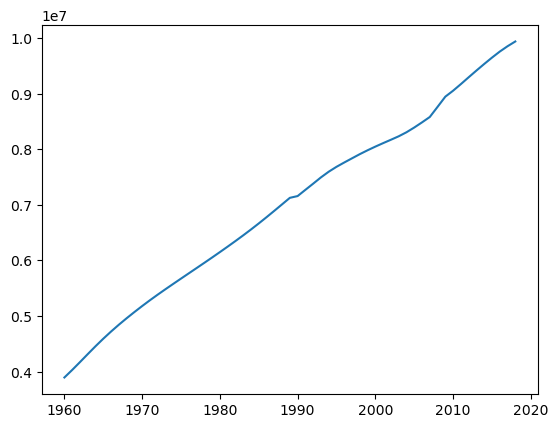

In [74]:
plt.plot(populations_aze['year'], populations_aze['population'])

### Exercise
1. Create a data frame `df_avg` that contains the average of all countries in the data frame for each year. (You can use `groupby` for this again.) In the end, you want a table with two columns: year and population.
2. Plot this average as a lineplot over the years.